In [1]:
import pandas as pd
import numpy as np
import random as rn
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv(r'C:\ardhra\Kmedoid\iris.csv')
print("Dataset size")
print("Rows {} Columns {}".format(data.shape[0], data.shape[1]))

Dataset size
Rows 150 Columns 5


In [26]:
df = data.copy()

In [27]:
x = data.iloc[:, :4].values

In [28]:
def distance(x, y):
    return np.linalg.norm(x - y)

In [29]:
def initial_seeds_selection(x, k):
    seeds = rn.sample(range(len(x)), k)
    return [tuple(x[i]) for i in seeds]

In [30]:
def make_cluster(x, medoids):
    cost = 0
    clusters = {i: [] for i in range(len(medoids))}
    
    for point in x:
        distances = [distance(point, medoid) for medoid in medoids]
        min_distance = min(distances)
        min_index = distances.index(min_distance)
        
        cost += min_distance
        clusters[min_index].append(tuple(point))
    
    return clusters, cost

In [31]:
def kmedoids(x, k, maxiter):
    medoids = initial_seeds_selection(x, k)
    clusters, cost = make_cluster(x, medoids)
    min_cost = cost
    
    for _ in range(maxiter):
        swap_candidate = rn.choice(x)
        
        if swap_candidate not in medoids:
            for i, medoid in enumerate(medoids):
                temp = medoids.copy()
                temp[i] = tuple(swap_candidate)
                
                new_clusters, new_cost = make_cluster(x, temp)
                
                if new_cost < min_cost:
                    min_cost = new_cost
                    clusters = new_clusters
                    medoids = temp
        else:
            continue
    
    return clusters, medoids, min_cost

In [35]:
# Function for k-medoids algorithm
def kmedoids(x, k, maxiter):
    medoids = initial_seeds_selection(x, k)
    clusters, cost = make_cluster(x, medoids)
    min_cost = cost
    
    for _ in range(maxiter):
        swap_candidate = rn.choice(x)
        
        # Check if the swap_candidate is in the list of medoids
        if tuple(swap_candidate) not in medoids:
            for i, medoid in enumerate(medoids):
                temp = medoids.copy()
                temp[i] = tuple(swap_candidate)
                
                new_clusters, new_cost = make_cluster(x, temp)
                
                if new_cost < min_cost:
                    min_cost = new_cost
                    clusters = new_clusters
                    medoids = temp
        else:
            continue
    
    return clusters, medoids, min_cost


In [40]:
def plot_clusters(x, clusters, medoids):
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
    markers = ['o', 's', 'D', '^', 'v', '<', '>']

    for i, (cluster, medoid) in enumerate(zip(clusters.values(), medoids)):
        cluster_points = np.array(cluster)
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colors[i % len(colors)], marker=markers[i % len(markers)], label=f'Cluster {i + 1}')

        # Plot medoid
        plt.scatter(medoid[0], medoid[1], c='black', marker='x', s=100, label=f'Medoid {i + 1}')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-Medoids Clustering')
    plt.legend()
    plt.show()

In [52]:
k_clusters = 3
max_iterations = 100

In [53]:
final_clusters, final_medoids, final_cost = kmedoids(x, k_clusters, max_iterations)


In [54]:
print("Clusters:")
for i, cluster in final_clusters.items():
    print(f"Cluster {i + 1}: {cluster}")

Clusters:
Cluster 1: [(7.0, 3.2, 4.7, 1.4), (6.9, 3.1, 4.9, 1.5), (6.8, 2.8, 4.8, 1.4), (6.7, 3.0, 5.0, 1.7), (6.0, 2.7, 5.1, 1.6), (6.7, 3.1, 4.7, 1.5), (6.3, 3.3, 6.0, 2.5), (5.8, 2.7, 5.1, 1.9), (7.1, 3.0, 5.9, 2.1), (6.3, 2.9, 5.6, 1.8), (6.5, 3.0, 5.8, 2.2), (7.6, 3.0, 6.6, 2.1), (7.3, 2.9, 6.3, 1.8), (6.7, 2.5, 5.8, 1.8), (7.2, 3.6, 6.1, 2.5), (6.5, 3.2, 5.1, 2.0), (6.4, 2.7, 5.3, 1.9), (6.8, 3.0, 5.5, 2.1), (5.8, 2.8, 5.1, 2.4), (6.4, 3.2, 5.3, 2.3), (6.5, 3.0, 5.5, 1.8), (7.7, 3.8, 6.7, 2.2), (7.7, 2.6, 6.9, 2.3), (6.9, 3.2, 5.7, 2.3), (7.7, 2.8, 6.7, 2.0), (6.3, 2.7, 4.9, 1.8), (6.7, 3.3, 5.7, 2.1), (7.2, 3.2, 6.0, 1.8), (6.2, 2.8, 4.8, 1.8), (6.1, 3.0, 4.9, 1.8), (6.4, 2.8, 5.6, 2.1), (7.2, 3.0, 5.8, 1.6), (7.4, 2.8, 6.1, 1.9), (7.9, 3.8, 6.4, 2.0), (6.4, 2.8, 5.6, 2.2), (6.3, 2.8, 5.1, 1.5), (6.1, 2.6, 5.6, 1.4), (7.7, 3.0, 6.1, 2.3), (6.3, 3.4, 5.6, 2.4), (6.4, 3.1, 5.5, 1.8), (6.9, 3.1, 5.4, 2.1), (6.7, 3.1, 5.6, 2.4), (6.9, 3.1, 5.1, 2.3), (5.8, 2.7, 5.1, 1.9), (6.8, 3.2,

In [55]:
print("\nFinal Medoids:")
print(final_medoids)

print("\nTotal Cost:", final_cost)


Final Medoids:
[(6.8, 3.0, 5.5, 2.1), (5.7, 2.8, 4.1, 1.3), (5.1, 3.4, 1.5, 0.2)]

Total Cost: 99.86572295898038


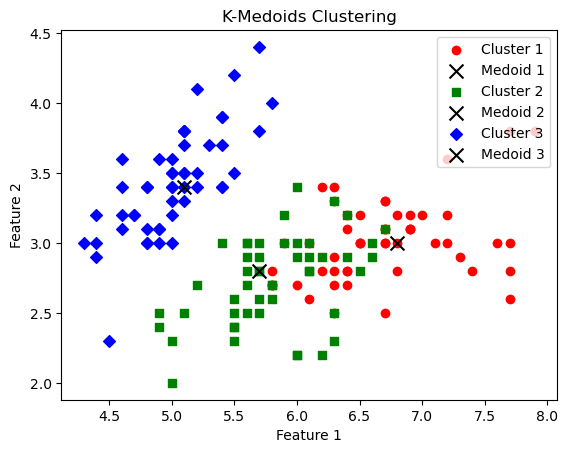

In [56]:
plot_clusters(x, final_clusters, final_medoids)